Downloaded the Dataset from [Kaggle](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset/data)

## About the data:
### Overview

The Global Earthquake-Tsunami Risk Assessment Dataset is a comprehensive, machine learning-ready dataset containing seismic characteristics and tsunami potential indicators for 782 significant earthquakes recorded globally from 2001 to 2022. This dataset is specifically designed for tsunami risk prediction, earthquake analysis, and seismic hazard assessment applications.
### Dataset Information
- Total Records: 782 earthquakes
- Time Period: January 1, 2001 to December 31, 2022 (22 years)
Geographic Coverage: Global (Latitude: -61.85° to 71.63°, Longitude: -179.97° to 179.66°)
- File Format: CSV
- File Size: ~41KB
- Missing Values: None (100% complete dataset)
- Target Variable: Tsunami potential indicator (binary classification)

### Key Features
Tsunami Classification

- Non-Tsunami Events: 478 records (61.1%)
- Tsunami-Potential Events: 304 records (38.9%)
- Balanced Dataset: Suitable for binary classification tasks

Seismic Magnitude Distribution

- Range: 6.5 - 9.1 Richter scale
- Mean Magnitude: 6.94
- Major Earthquakes (≥8.0): 28 events including the 2004 (9.1) and 2011 (9.1) mega-earthquakes


# **General Info**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path_to_file = "kaggle\kaggle_datasets\01_earthquake_data\01_earthquake_data_tsunami.csv"

In [7]:
df = pd.read_csv(path_to_file)

In [8]:
# How big is the data?
df.shape

(782, 13)

In [9]:
# How does the data look like
df.head

<bound method NDFrame.head of      magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0          7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1          6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2          7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3          7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4          6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   
..         ...  ...  ...  ...  ...    ...   ...      ...       ...        ...   
777        7.7    0    8  912  427  0.000   0.0   60.000   13.0490    -88.660   
778        6.9    5    7  745    0  0.000   0.0   36.400   56.7744   -153.281   
779        7.1    0    7  776  372  0.000   0.0  103.000  -14.9280    167.170   
780        6.8    0    5  711   64  0.000   0.0   33.000    6.6310    126.899   
781        7.5    0    7  865  324  0.000   0.0   33.000    6.8980    126.579  

In [10]:
df.sample(10)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
688,6.5,0,7,650,305,0.000,39.0,13.40,-0.4430,133.0910,2004,7,0
192,6.8,5,5,727,0,4.852,21.0,10.00,-15.3197,-173.1680,2017,11,1
542,7.8,6,8,1165,434,0.000,16.8,12.00,-45.7620,166.5620,2009,7,0
661,6.5,0,7,650,371,0.000,31.8,10.00,-5.5620,122.1290,2005,2,0
122,7.2,7,7,809,0,1.504,38.0,18.98,-0.5858,128.0340,2019,7,1
503,7.2,5,6,918,611,0.000,20.6,38.00,3.7480,96.0180,2010,5,0
418,6.7,0,4,691,521,0.000,13.7,200.70,-14.3440,167.2860,2012,12,0
108,6.7,8,9,1247,0,0.870,49.0,10.00,38.4312,39.0609,2020,1,0
198,8.2,9,7,2910,0,0.944,22.0,47.39,15.0222,-93.8993,2017,9,1
720,7.0,0,6,754,473,0.000,30.3,31.00,2.3540,128.8550,2003,5,0


In [11]:
# Data type of columns
df.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [12]:
# How does the data look
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [13]:
# Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [14]:
# Correlation between columns
df.corr()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.057083,-0.011926,-0.004726
cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.423158,0.007002,0.160266
mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.212855,-0.035238,-0.147363
sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.124439,-0.029189,-0.015500
nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.688602,-0.014021,-0.600231
dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.529449,0.037502,0.400752
gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.194002,-0.024953,0.116360
depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.178220,0.069213,0.056814
latitude,-0.008552,0.129003,0.144883,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.089731,-0.057292,-0.113209
longitude,-0.013911,-0.149048,-0.005803,-0.190132,0.173665,-0.097875,-0.313623,-0.036986,0.026927,1.000000,-0.187947,0.028047,-0.136778


# **Analysis**

In [45]:
# Checking Skewness of the data
df.skew()

magnitude    1.444440
cdi         -0.197310
mmi         -0.250403
sig          3.083629
nst          0.533307
dmin         2.604580
gap          4.668607
depth        3.024869
latitude     0.200853
longitude   -0.702982
Year        -0.192450
Month       -0.067928
tsunami      0.457333
dtype: float64

In [16]:
# Accessing highest magnitude and year of earthquake

max_magnitude_row = df.loc[df['magnitude'].idxmax(axis=0)]
print(max_magnitude_row)

magnitude       9.100
cdi             9.000
mmi             8.000
sig          2184.000
nst           541.000
dmin            0.000
gap             9.500
depth          29.000
latitude       38.297
longitude     142.373
Year         2011.000
Month           3.000
tsunami         0.000
Name: 476, dtype: float64


In [17]:
max_magnitude = max_magnitude_row['magnitude']
year = max_magnitude_row['Year']
latitude = max_magnitude_row['latitude']
longitude = max_magnitude_row['longitude']
month = max_magnitude_row['Month']

In [18]:
print(f"Maximum Magnitude: {max_magnitude}")
print(f"Year of Occurence: {year:.0f}")
print(f"Latitude: {latitude}\nLongitude: {longitude}")
print(f"Month of occurence: {month:.0f}")

Maximum Magnitude: 9.1
Year of Occurence: 2011
Latitude: 38.297
Longitude: 142.373
Month of occurence: 3


# **Plotting Data**

<Axes: xlabel='Year', ylabel='magnitude'>

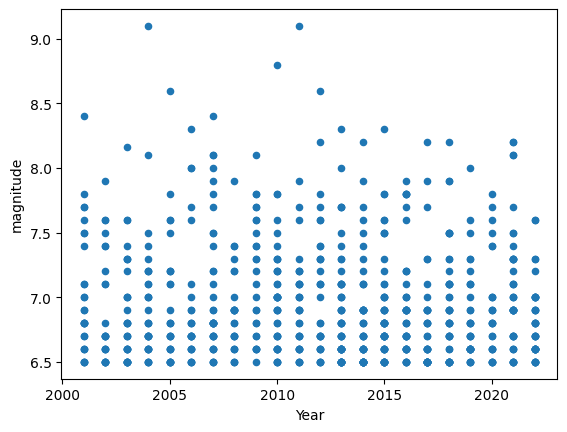

In [19]:
df.plot(kind='scatter', x='Year', y='magnitude') # should pass only column names and not series

<Axes: xlabel='Year'>

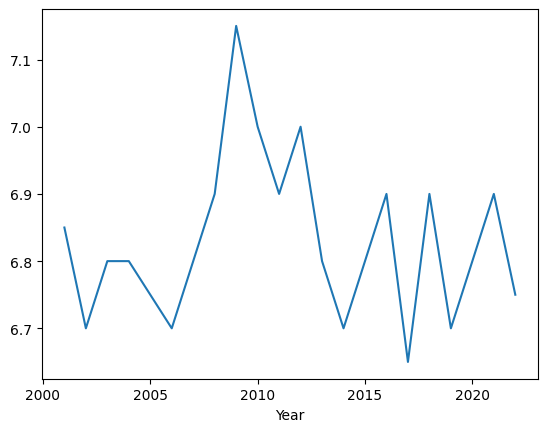

In [20]:
# Median magnitude per year
yearly_median = df.groupby('Year')['magnitude'].median()
yearly_median.plot(kind='line')

<Axes: xlabel='Year'>

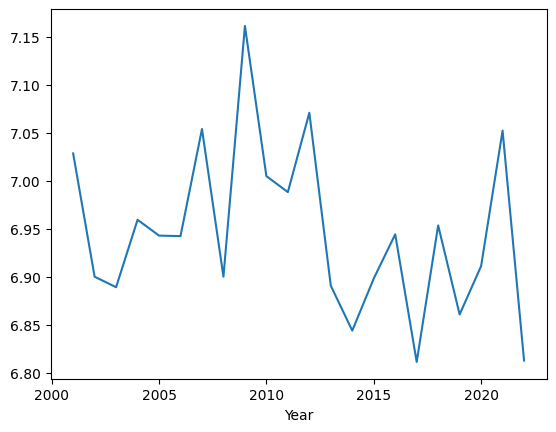

In [21]:
# Average magnitude per year
yearly_avg = df.groupby('Year')['magnitude'].mean()
yearly_avg.plot(kind='line')

<Axes: ylabel='Frequency'>

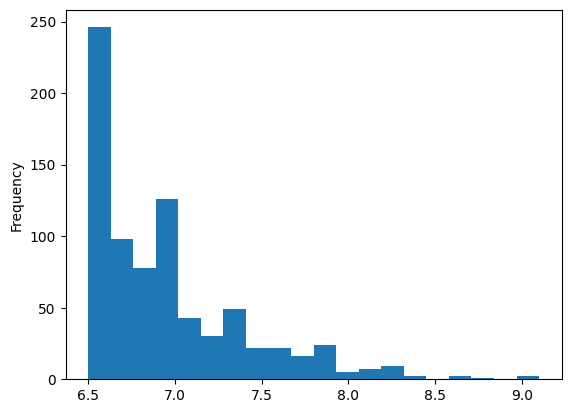

In [22]:
df['magnitude'].plot.hist(bins=20)

<Axes: xlabel='magnitude', ylabel='Density'>

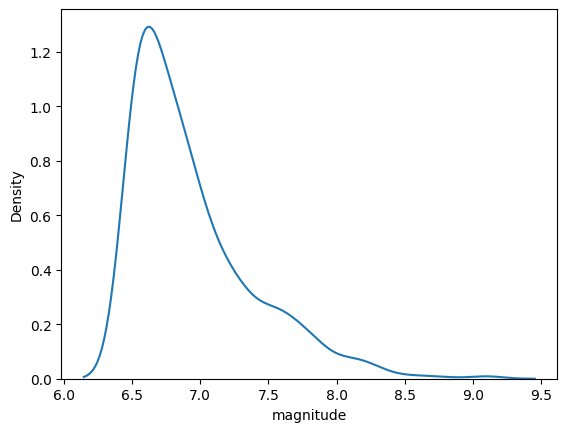

In [23]:
sns.kdeplot(df['magnitude'])

# **Major Earthquakes**

In [24]:
maj_quakes = df[df['magnitude'] > 7]
print(f"No. of major earthquakes (magnitude > 7): {len(maj_quakes)}")

No. of major earthquakes (magnitude > 7): 234


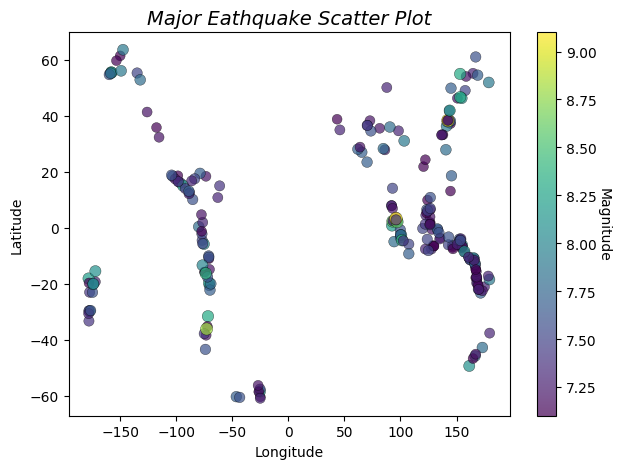

In [25]:
# Scatter plot of major earthquakes and its epicenters
eq_scatter = plt.scatter(
    maj_quakes['longitude'],
    maj_quakes['latitude'],
    c=maj_quakes['magnitude'],
    s=maj_quakes['magnitude']**2,
    cmap='viridis',
    alpha=0.7,
    edgecolors='k',
    linewidths=0.3   
)

plt.title('Major Eathquake Scatter Plot', fontsize=14, fontstyle='oblique')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# colorbar
cbar = plt.colorbar(eq_scatter, orientation='vertical')
cbar.set_label('Magnitude', rotation=270, labelpad=10)

# Saving the figure
plt.tight_layout()
plt.savefig('major_earthquake_locations.png', dpi=300)


# **Tsunami**

tsunami
0    478
1    304
Name: count, dtype: int64
tsunami
No Tsunami    478
Tsunami       304
Name: count, dtype: int64


<Axes: ylabel='tsunami'>

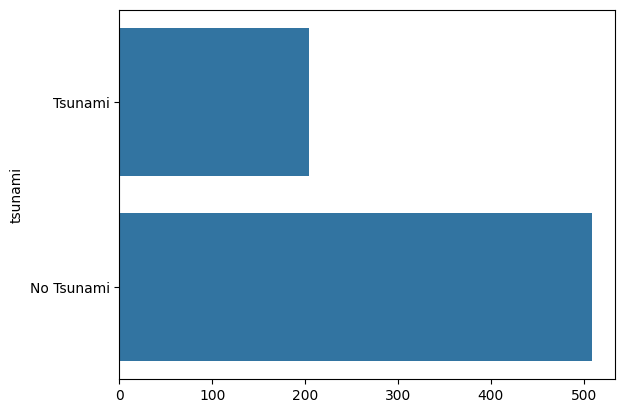

In [26]:
# counting tsunami

tsunami_counts = (
    df['tsunami']
    .map({0: "No Tsunami", 1: 'Tsunami'})
    .sort_values()
    .sort_index()
)

print(df['tsunami'].value_counts())
print(tsunami_counts.value_counts())

sns.barplot(
    tsunami_counts, 
    errorbar=None,
)

A small issue I ran into while running the above code:
Seaborn tries to treat the index of the series as the categorical variable (the x-axis, which it's correctly doing for the y-axis in a horizontal bar plot) and the values of the series as the measure (the y-axis, which it's correctly doing for the x-axis in a horizontal bar plot).

However, the tsunami_counts Series created is a long Series of all the mapped values (478 instances of "No Tsunami" and 304 instances of "Tsunami"). It is not the aggregated count data.

When running `sns.barplot(tsunami_counts, errorbar=None)`, Seaborn is taking the entire 782-row Series as the y (or x) values, and in a horizontal bar plot, it seems to be performing an implicit aggregation (like counting or averaging) on the data, but doing so incorrectly or in a way that leads to a misleading visualization.

tsunami
0    478
1    304
Name: count, dtype: int64
tsunami
No Tsunami    478
Tsunami       304
Name: count, dtype: int64


<Axes: xlabel='tsunami_label', ylabel='count'>

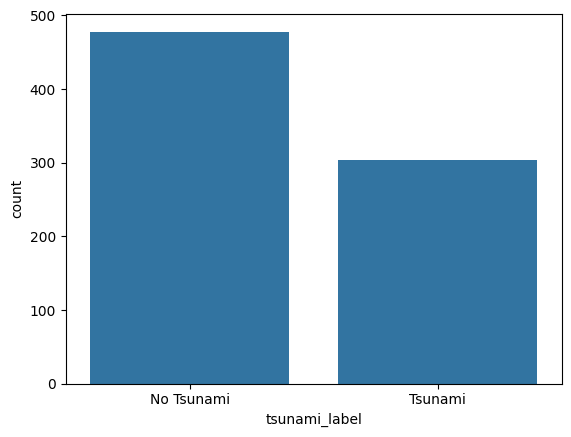

In [27]:
# counting tsunami

tsunami_counts = (
    df['tsunami']
    .map({0: "No Tsunami", 1: 'Tsunami'})
    .sort_values()
    .sort_index()
)

final_count = tsunami_counts.value_counts().reset_index()
final_count.columns = ['tsunami_label', 'count'] # Renaming the columns

print(df['tsunami'].value_counts())
print(tsunami_counts.value_counts())

sns.barplot(
    data=final_count,
    x='tsunami_label',
    y='count',
)

Text(0.5, 0, 'Tsunami Occurence')

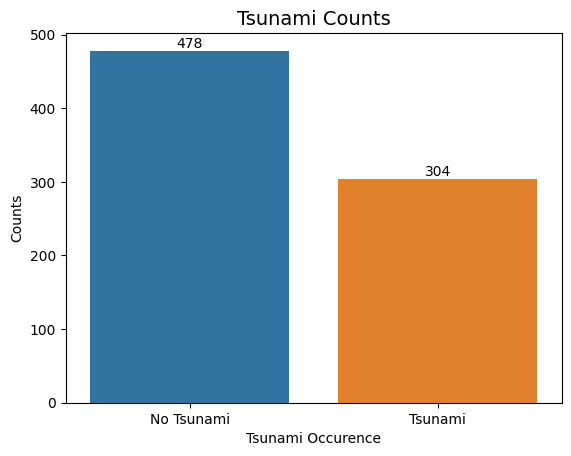

In [ ]:
# Or this could also be employed

bar_data = tsunami_counts.value_counts()

ax = sns.barplot(
    x=bar_data.index, # passed into the array ['no tsunami' 'tsunami']
    y=bar_data.values, # # passed into the array [478 304]
    hue=bar_data.index
)

# To add label
for container in ax.containers:
    ax.bar_label(container)

plt.title('Tsunami Counts', fontsize=14)
plt.ylabel('Counts')
plt.xlabel('Tsunami Occurence')

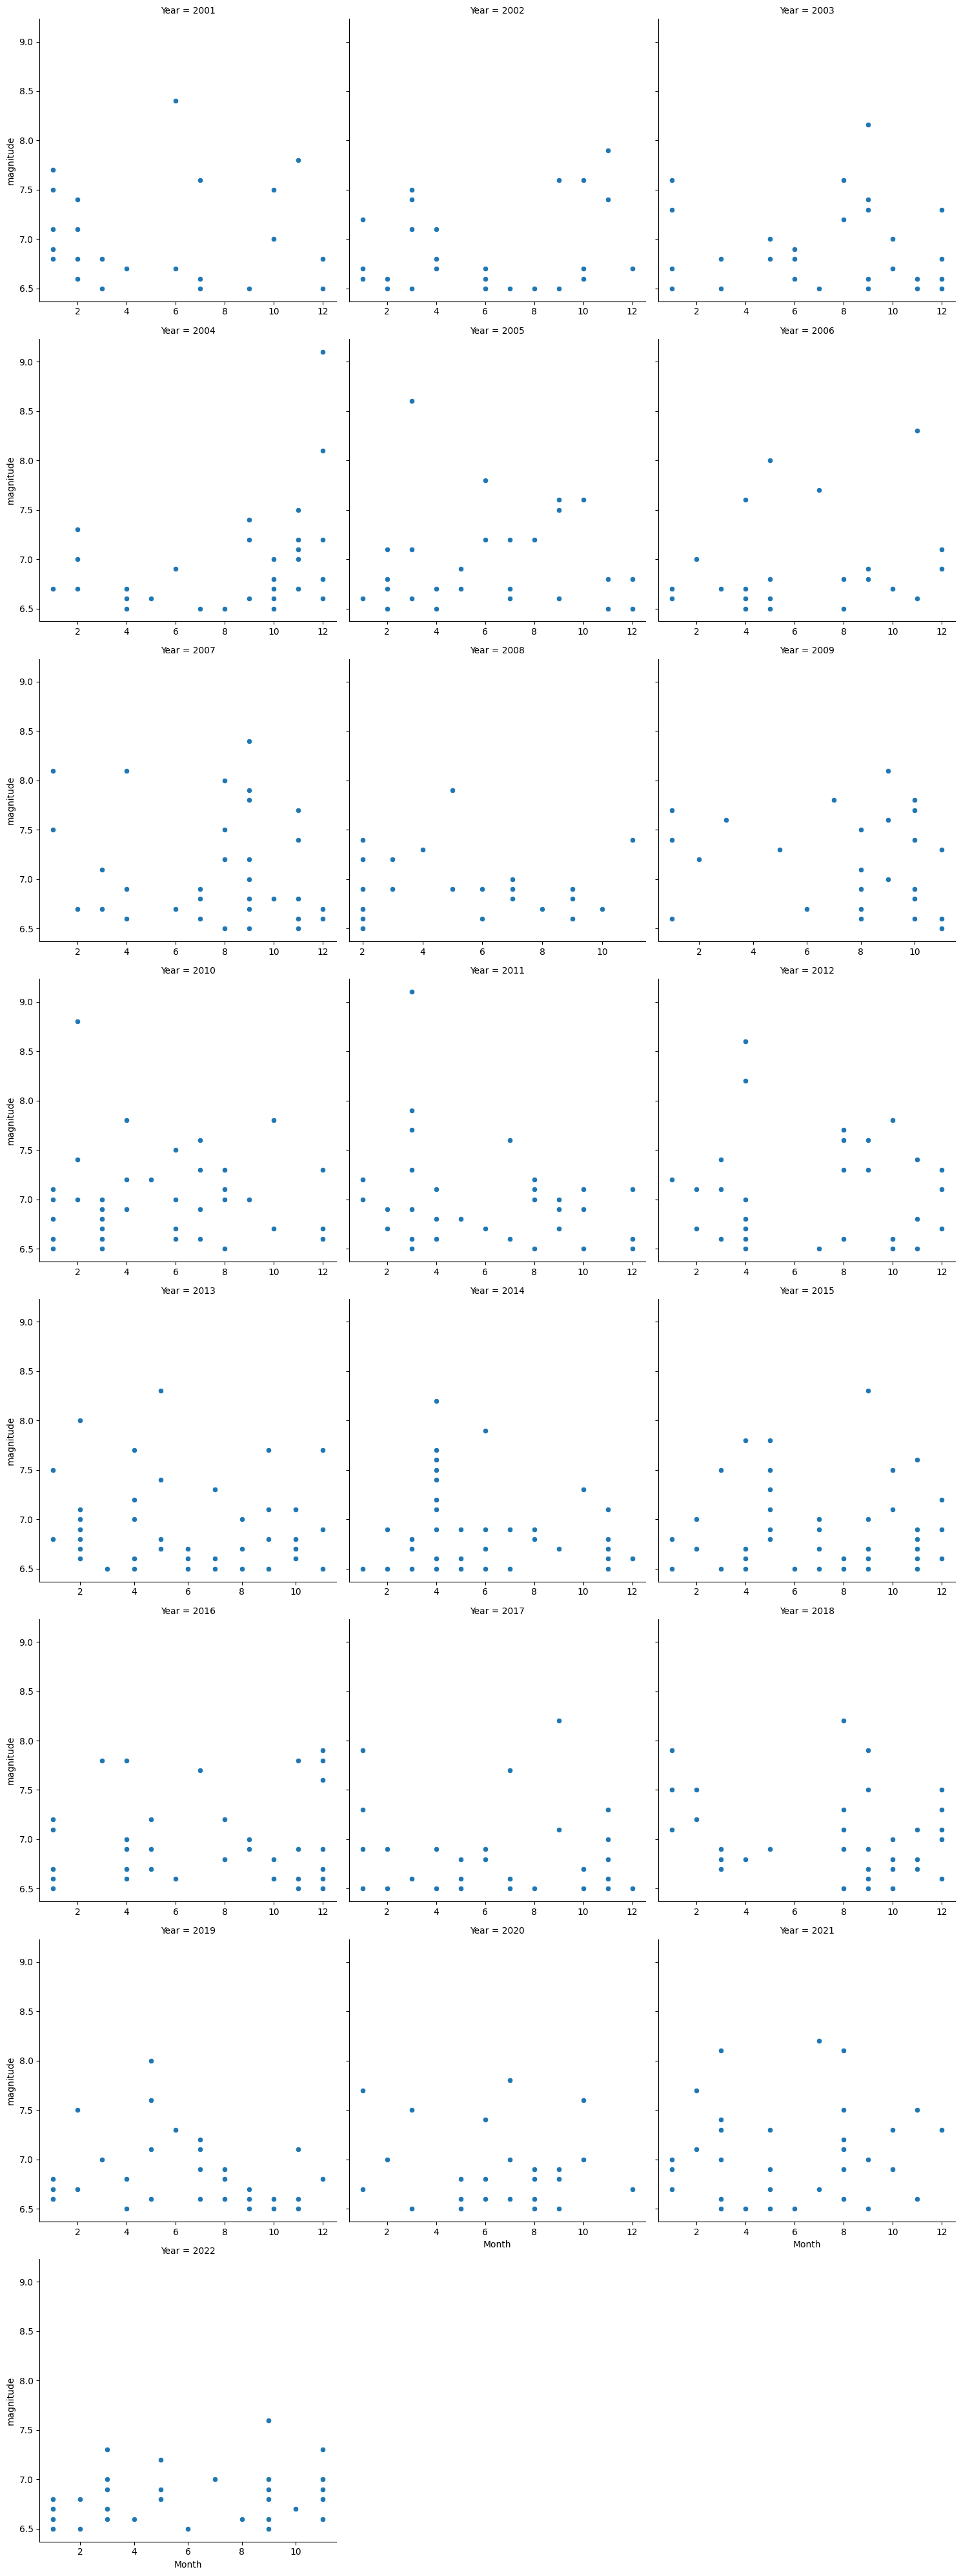

In [ ]:
# Looking into each month of the year to look for any relation to earthquake magnitude and the month

sns.relplot(data=df, x='Month', y='magnitude', kind='scatter', col='Year', col_wrap=3, facet_kws={'sharex': False})

## **Heatmaps**

In [59]:
# Using Heatmaps
heatmap_data = df.pivot_table(index='Year', values='magnitude', columns='Month', aggfunc='count')

In [61]:
heatmap_data

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2001,7.0,4.0,2.0,1.0,NaN,2.0,4.0,NaN,1.0,3.0,1.0,3.0
2002,3.0,2.0,4.0,3.0,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0
2003,4.0,NaN,2.0,NaN,3.0,3.0,1.0,2.0,5.0,3.0,3.0,5.0
2004,1.0,3.0,NaN,3.0,1.0,1.0,1.0,1.0,3.0,5.0,7.0,6.0
2005,1.0,5.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,3.0
2006,2.0,1.0,1.0,5.0,5.0,NaN,1.0,2.0,2.0,3.0,2.0,2.0
2007,2.0,1.0,2.0,3.0,NaN,1.0,3.0,4.0,9.0,2.0,8.0,2.0
2008,NaN,8.0,2.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,1.0,NaN
2009,3.0,1.0,1.0,NaN,1.0,1.0,1.0,5.0,3.0,7.0,3.0,NaN


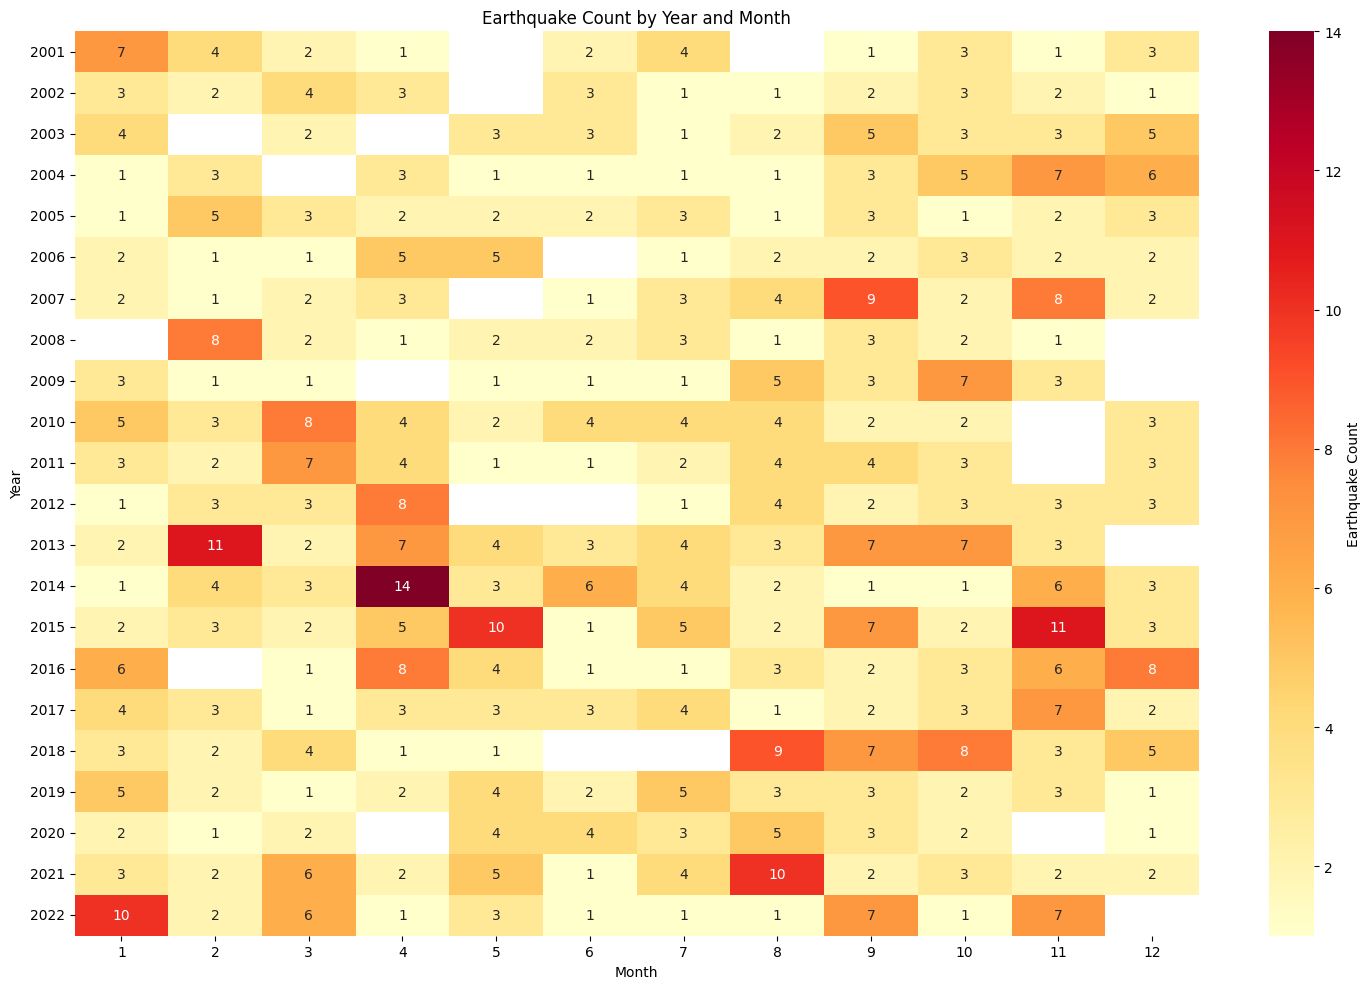

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(data=heatmap_data, annot=True, cmap='YlOrRd', cbar_kws={'label': 'Earthquake Count'})
plt.title('Earthquake Count by Year and Month')
plt.tight_layout()
plt.savefig('earthquake_count_heatmap.png', dpi=300)

In [77]:
# Average Magnitude heatmap
avg_magheat = df.pivot_table(index='Year', values='magnitude', columns='Month', aggfunc='mean')

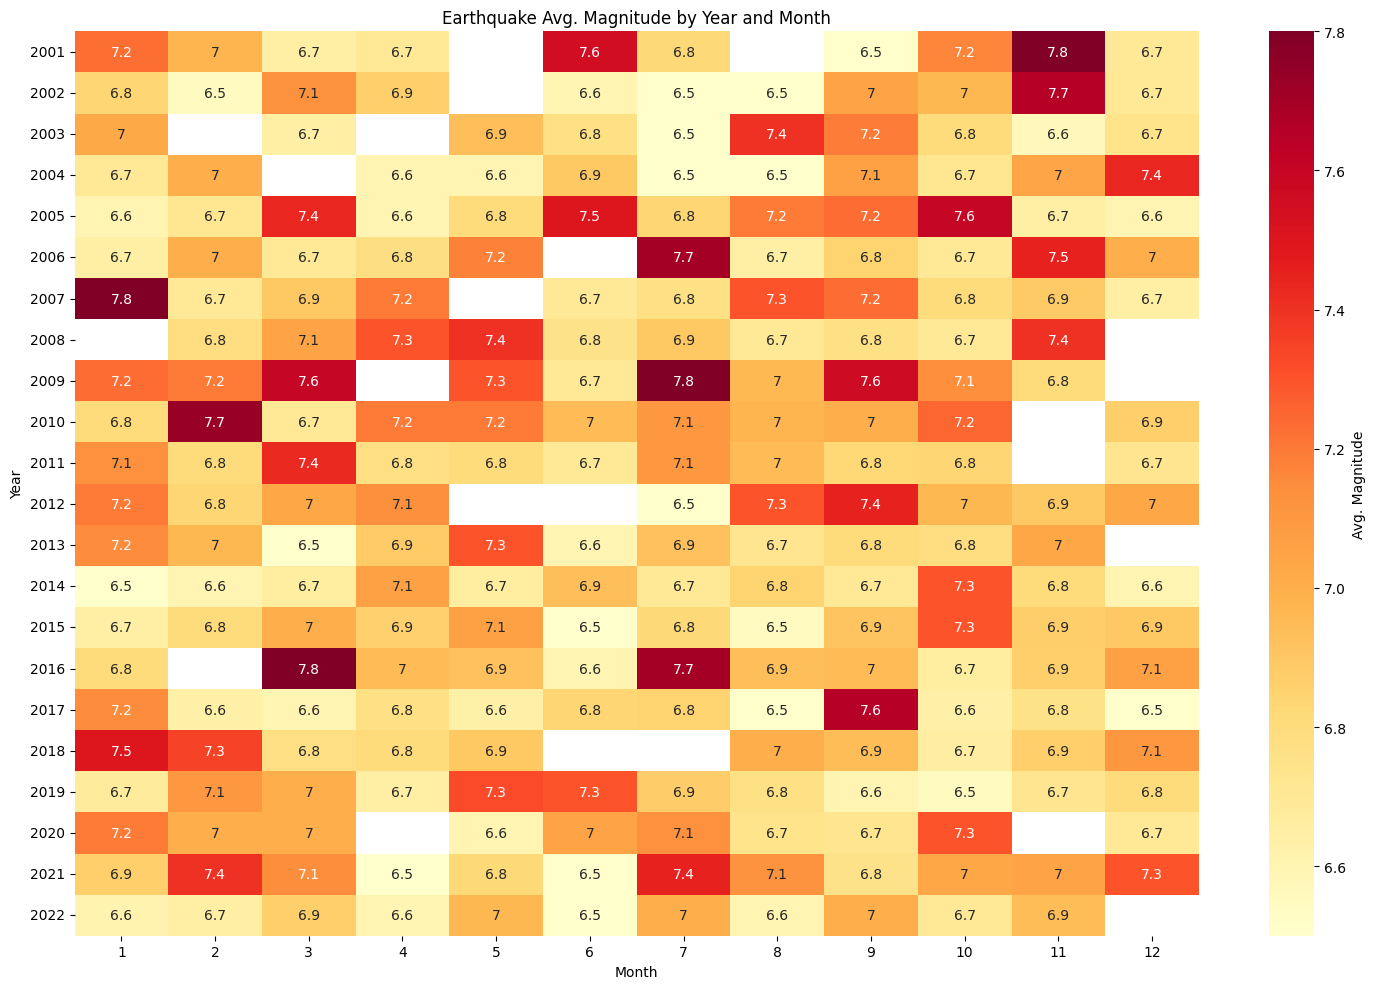

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(data=avg_magheat, annot=True, cmap='YlOrRd', cbar_kws={'label': 'Avg. Magnitude'})
plt.title('Earthquake Avg. Magnitude by Year and Month')
plt.tight_layout()
plt.savefig('earthquake_average_heatmap.png', dpi=300)

In [92]:
# Tsunami Occurence Heatmap
tsunami_heat = df.pivot_table(index='Year', values='tsunami', columns='Month', aggfunc='count')

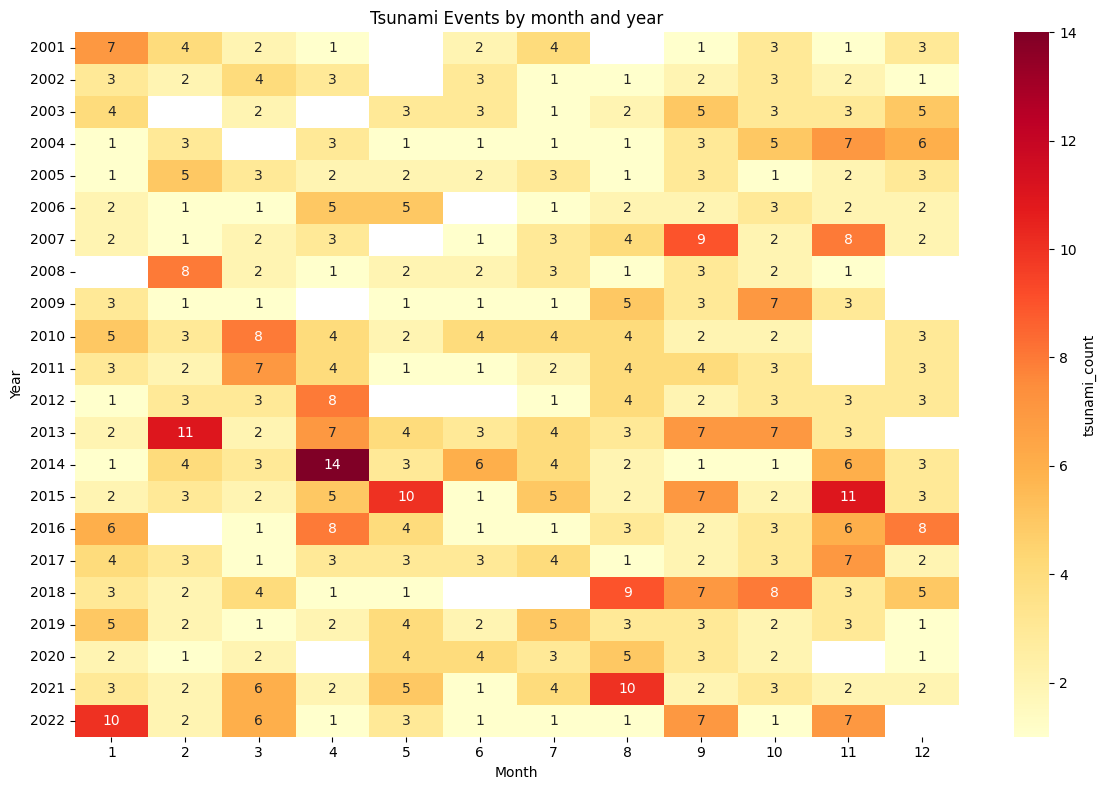

In [104]:
plt.figure(figsize=(12,8))
sns.heatmap(data=tsunami_heat, annot=True, cmap='YlOrRd', fmt='.0f', cbar_kws={'label': 'tsunami_count'})
plt.title('Tsunami Events by month and year')
plt.tight_layout()
plt.savefig('tsunami_counts.png')